In [3]:
import nltk
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Explicitly download punkt_tab

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
import nltk
try:
    nltk.download('punkt_tab')
    print("punkt_tab downloaded successfully.")
except Exception as e:
    print(f"Error downloading punkt_tab: {e}")

punkt_tab downloaded successfully.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
import nltk, string, pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "This phone has great battery life",
    "Battery life on this phone is poor",
    "I love the camera on this phone"
]

# download once per session
nltk.download('punkt'); nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return [w for w in word_tokenize(text) if w not in stop_words]

tokens_list = [preprocess(doc) for doc in corpus]
vocab = sorted({w for sent in tokens_list for w in sent})

def bow_vector(tokens):
    return [tokens.count(term) for term in vocab]

manual_bow = [bow_vector(t) for t in tokens_list]
manual_df  = pd.DataFrame(manual_bow, columns=vocab)

cv = CountVectorizer(lowercase=True, stop_words='english')
cv_bow = cv.fit_transform(corpus).toarray()
cv_df  = pd.DataFrame(cv_bow, columns=cv.get_feature_names_out())

print(manual_df, '\n'); print(cv_df)


   battery  camera  great  life  love  phone  poor
0        1       0      1     1     0      1     0
1        1       0      0     1     0      1     1
2        0       1      0     0     1      1     0 

   battery  camera  great  life  love  phone  poor
0        1       0      1     1     0      1     0
1        1       0      0     1     0      1     1
2        0       1      0     0     1      1     0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
sentence = "Natural language processing is fascinating and powerful"
tokens   = word_tokenize(sentence.lower())

for n in range(1, 5):
    grams = list(ngrams(tokens, n))
    print(f"{n}-grams:", grams)

bigram_freq  = Counter(ngrams(tokens, 2))
trigram_freq = Counter(ngrams(tokens, 3))
print("Top bigrams:", bigram_freq.most_common())
print("Top trigrams:", trigram_freq.most_common())


1-grams: [('natural',), ('language',), ('processing',), ('is',), ('fascinating',), ('and',), ('powerful',)]
2-grams: [('natural', 'language'), ('language', 'processing'), ('processing', 'is'), ('is', 'fascinating'), ('fascinating', 'and'), ('and', 'powerful')]
3-grams: [('natural', 'language', 'processing'), ('language', 'processing', 'is'), ('processing', 'is', 'fascinating'), ('is', 'fascinating', 'and'), ('fascinating', 'and', 'powerful')]
4-grams: [('natural', 'language', 'processing', 'is'), ('language', 'processing', 'is', 'fascinating'), ('processing', 'is', 'fascinating', 'and'), ('is', 'fascinating', 'and', 'powerful')]
Top bigrams: [(('natural', 'language'), 1), (('language', 'processing'), 1), (('processing', 'is'), 1), (('is', 'fascinating'), 1), (('fascinating', 'and'), 1), (('and', 'powerful'), 1)]
Top trigrams: [(('natural', 'language', 'processing'), 1), (('language', 'processing', 'is'), 1), (('processing', 'is', 'fascinating'), 1), (('is', 'fascinating', 'and'), 1), (

In [7]:
from math import log
from sklearn.feature_extraction.text import TfidfVectorizer
docs = [
    "Stock market crashes amid global uncertainty",
    "Global leaders discuss climate change solutions"
]

# scikit-learn path
vec = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf = vec.fit_transform(docs).toarray()
print(pd.DataFrame(tfidf, columns=vec.get_feature_names_out()))

# manual IDF (for pedagogy)
tokens = [word_tokenize(d.lower()) for d in docs]
stop = set(stopwords.words('english'))
proc   = [[w for w in t if w.isalpha() and w not in stop] for t in tokens]
vocab  = sorted({w for doc in proc for w in doc})
idf    = {t: log(len(docs) / sum(t in p for p in proc)) for t in vocab}
tfidf_manual = []
for doc in proc:
    length = len(doc)
    tfidf_manual.append([doc.count(t)/length*idf[t] for t in vocab])
print(pd.DataFrame(tfidf_manual, columns=vocab))


      amid   change  climate  crashes  discuss    global  leaders   market  \
0  0.42616  0.00000  0.00000  0.42616  0.00000  0.303216  0.00000  0.42616   
1  0.00000  0.42616  0.42616  0.00000  0.42616  0.303216  0.42616  0.00000   

   solutions    stock  uncertainty  
0    0.00000  0.42616      0.42616  
1    0.42616  0.00000      0.00000  
       amid    change   climate   crashes   discuss  global   leaders  \
0  0.115525  0.000000  0.000000  0.115525  0.000000     0.0  0.000000   
1  0.000000  0.115525  0.115525  0.000000  0.115525     0.0  0.115525   

     market  solutions     stock  uncertainty  
0  0.115525   0.000000  0.115525     0.115525  
1  0.000000   0.115525  0.000000     0.000000  


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-4/Conversion_techniques/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [10]:
y = df['Sell Price($)']

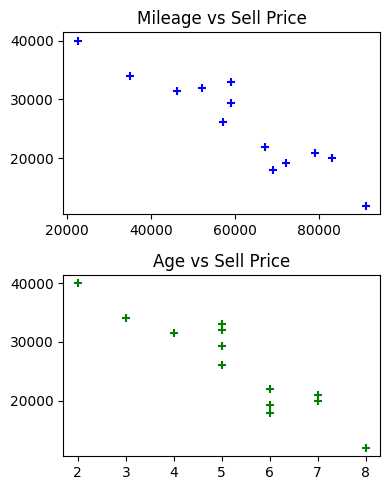

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize = (4, 5))
axs[0].scatter(df['Mileage'], y, color = 'b', marker= '+')
axs[0].set_title('Mileage vs Sell Price')
axs[1].scatter(df['Age(yrs)'], y, color = 'g', marker = '+')
axs[1].set_title('Age vs Sell Price')
plt.tight_layout()
plt.show()

In [12]:
df_dummies = pd.get_dummies(df['Car Model'], dtype = 'int')
df_dummies.head()

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [13]:
df0 = pd.concat([df, df_dummies], axis= 1)
df0.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [14]:
y = df0['Sell Price($)']
X = df0.drop(['Car Model', 'Sell Price($)', 'Mercedez Benz C class'], axis =  1)
X.head()


,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [16]:
model.score(X, y)

0.9417050937281082

In [17]:
model.predict([[45000,4,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [18]:
model.predict([[86000,7,0,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

Dummies& OnehotEncoding

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-4/Conversion_techniques/homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [21]:
df_dummies = pd.get_dummies(df['town'], dtype = 'int')
df_dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [22]:
df0 = pd.concat([df, df_dummies], axis = 1)
df0

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [31]:
# Drop the original 'town' column from df before concatenating
df_no_town = df.drop('town', axis=1)
df0 = pd.concat([df_no_town, df_dummies], axis=1)
df0

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [37]:
X = df0.drop(['price', 'west windsor'], axis = 1)
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [35]:
y = df0['price']
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [38]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [39]:
model.score(X, y)

0.9573929037221872

In [40]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [42]:
print(type(dfle))

<class 'pandas.core.frame.DataFrame'>


In [43]:
dfle['town'] = le.fit_transform(dfle['town'])
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [44]:
y = df['price']
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [46]:
X = X[:, 1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [48]:
model.fit(X , y)

LinearRegression()

In [49]:
model.predict([[0, 1, 3400]])

array([681241.6684584])